In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2023-01-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2023_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-01-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",9375,동래구,10500,동래구,1125,12.0%,"9,938"
1,2023-01-12,간장,오복왕표 0.9ℓ 1병,7500,동래구,8350,동래구,850,11.33%,"7,925"
2,2023-01-12,갈치,60cm정도 500g 1마리(냉동),11820,동래구,15840,동래구,4020,34.01%,"13,830"
3,2023-01-12,고등어,30㎝정도 500g 1마리,4420,동래구,4600,동래구,180,4.07%,"4,510"
4,2023-01-12,달걀,오경슈퍼란60g정도 10개,4290,동래구,4400,동래구,110,2.56%,"4,345"
5,2023-01-12,닭고기,육계 1.0㎏,7483,동래구,11650,동래구,4167,55.69%,"9,567"
6,2023-01-12,대파,1.0㎏,4900,동래구,5162,동래구,262,5.35%,"5,031"
7,2023-01-12,돼지고기,삼겹살 500g,7850,동래구,11800,동래구,3950,50.32%,"9,825"
8,2023-01-12,두부,500g 판두부(국산포장두부 420g) 1모,5150,동래구,5194,동래구,44,0.85%,"5,172"
9,2023-01-12,라면,신라면 120g 1봉지,820,동래구,820,동래구,0,0.0%,820


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2023-04-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2023_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-04-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",9375,동래구,10500,동래구,1125,12.0%,"9,938"
1,2023-04-13,간장,오복왕표 0.9ℓ 1병,7500,동래구,8351,동래구,851,11.35%,"7,926"
2,2023-04-13,갈치,60cm정도 500g 1마리(냉동),9900,동래구,19040,동래구,9140,92.32%,"14,470"
3,2023-04-13,고등어,30㎝정도 500g 1마리,4500,동래구,4900,동래구,400,8.89%,"4,700"
4,2023-04-13,달걀,오경슈퍼란60g정도 10개,3990,동래구,4400,동래구,410,10.28%,"4,195"
5,2023-04-13,닭고기,육계 1.0㎏,7916,동래구,9100,동래구,1184,14.96%,"8,508"
6,2023-04-13,대파,1.0㎏,2618,동래구,4000,동래구,1382,52.79%,"3,309"
7,2023-04-13,돼지고기,삼겹살 500g,8350,동래구,11200,동래구,2850,34.13%,"9,775"
8,2023-04-13,두부,500g 판두부(국산포장두부 420g) 1모,5150,동래구,5194,동래구,44,0.85%,"5,172"
9,2023-04-13,라면,신라면 120g 1봉지,820,동래구,820,동래구,0,0.0%,820


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2023-07-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2023_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-07-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",9375,동래구,11480,동래구,2105,22.45%,"10,428"
1,2023-07-13,간장,오복왕표 0.9ℓ 1병,7500,동래구,8420,동래구,920,12.27%,"7,960"
2,2023-07-13,갈치,60cm정도 500g 1마리(냉동),9900,동래구,14240,동래구,4340,43.84%,"12,070"
3,2023-07-13,고등어,30㎝정도 500g 1마리,4900,동래구,4980,동래구,80,1.63%,"4,940"
4,2023-07-13,달걀,오경슈퍼란60g정도 10개,3990,동래구,4400,동래구,410,10.28%,"4,195"
5,2023-07-13,닭고기,육계 1.0㎏,7916,동래구,10900,동래구,2984,37.7%,"9,408"
6,2023-07-13,대파,1.0㎏,3276,동래구,3990,동래구,714,21.79%,"3,633"
7,2023-07-13,돼지고기,삼겹살 500g,11900,동래구,13200,동래구,1300,10.92%,"12,550"
8,2023-07-13,두부,500g 판두부(국산포장두부 420g) 1모,5194,동래구,5660,동래구,466,8.97%,"5,427"
9,2023-07-13,라면,신라면 120g 1봉지,780,동래구,780,동래구,0,0.0%,780


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2023-10-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2023_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-10-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,동래구,8175,동래구,750,10.1%,"7,800"
1,2023-10-12,간장,오복왕표 0.9ℓ 1병,7500,동래구,8350,동래구,850,11.33%,"7,925"
2,2023-10-12,갈치,60cm정도 500g 1마리(냉동),9500,동래구,16142,동래구,6642,69.92%,"12,821"
3,2023-10-12,고등어,30㎝정도 500g 1마리,4900,동래구,4950,동래구,50,1.02%,"4,925"
4,2023-10-12,달걀,오경슈퍼란60g정도 10개,3990,동래구,4400,동래구,410,10.28%,"4,195"
5,2023-10-12,닭고기,육계 1.0㎏,7916,동래구,10950,동래구,3034,38.33%,"9,433"
6,2023-10-12,대파,1.0㎏,4490,동래구,5250,동래구,760,16.93%,"4,870"
7,2023-10-12,돼지고기,삼겹살 500g,9150,동래구,14500,동래구,5350,58.47%,"11,825"
8,2023-10-12,두부,500g 판두부(국산포장두부 420g) 1모,5194,동래구,5680,동래구,486,9.36%,"5,437"
9,2023-10-12,라면,신라면 120g 1봉지,780,동래구,780,동래구,0,0.0%,780


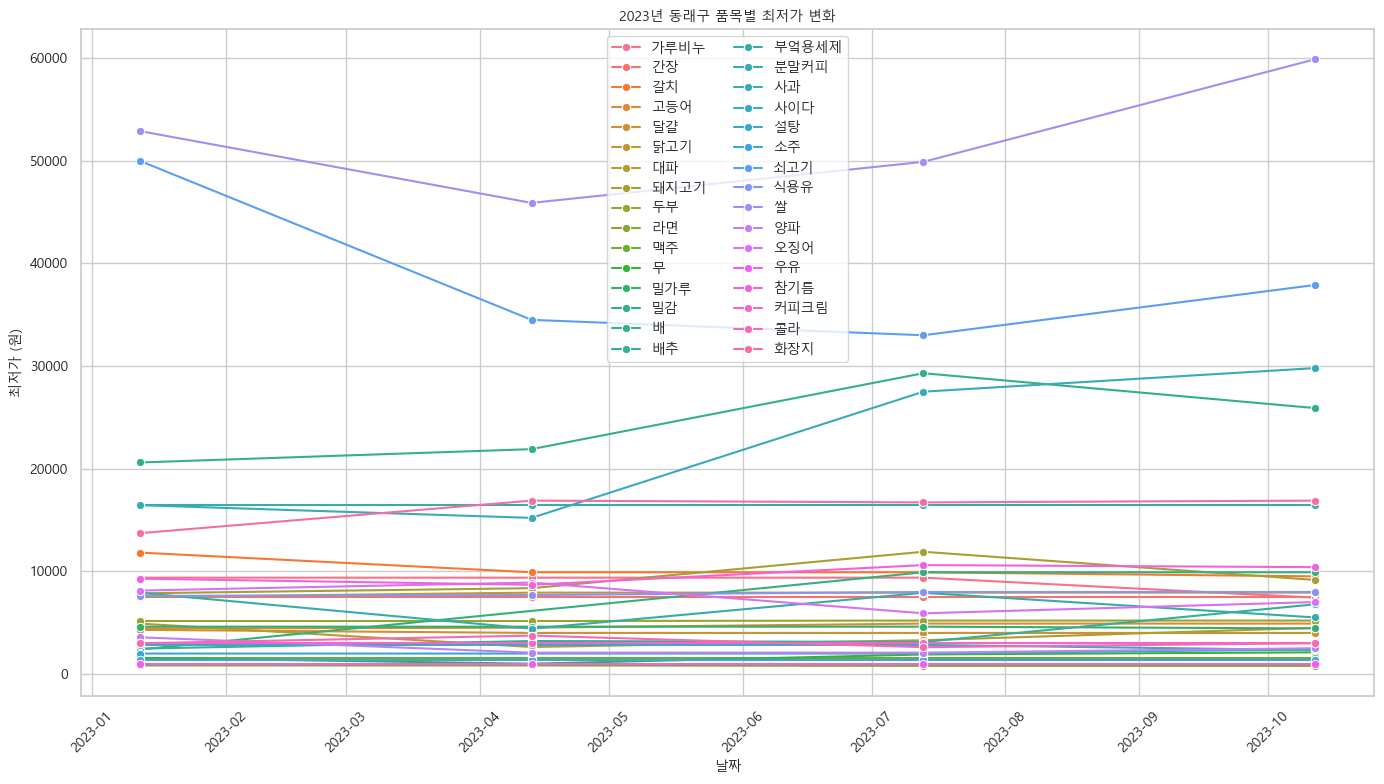

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2023_1q.csv")
q2 = pd.read_csv("동래구2023_2q.csv")
q3 = pd.read_csv("동래구2023_3q.csv")
q4 = pd.read_csv("동래구2023_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2023년 동래구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("동래구2023_min.csv", index=False, encoding="utf-8-sig")

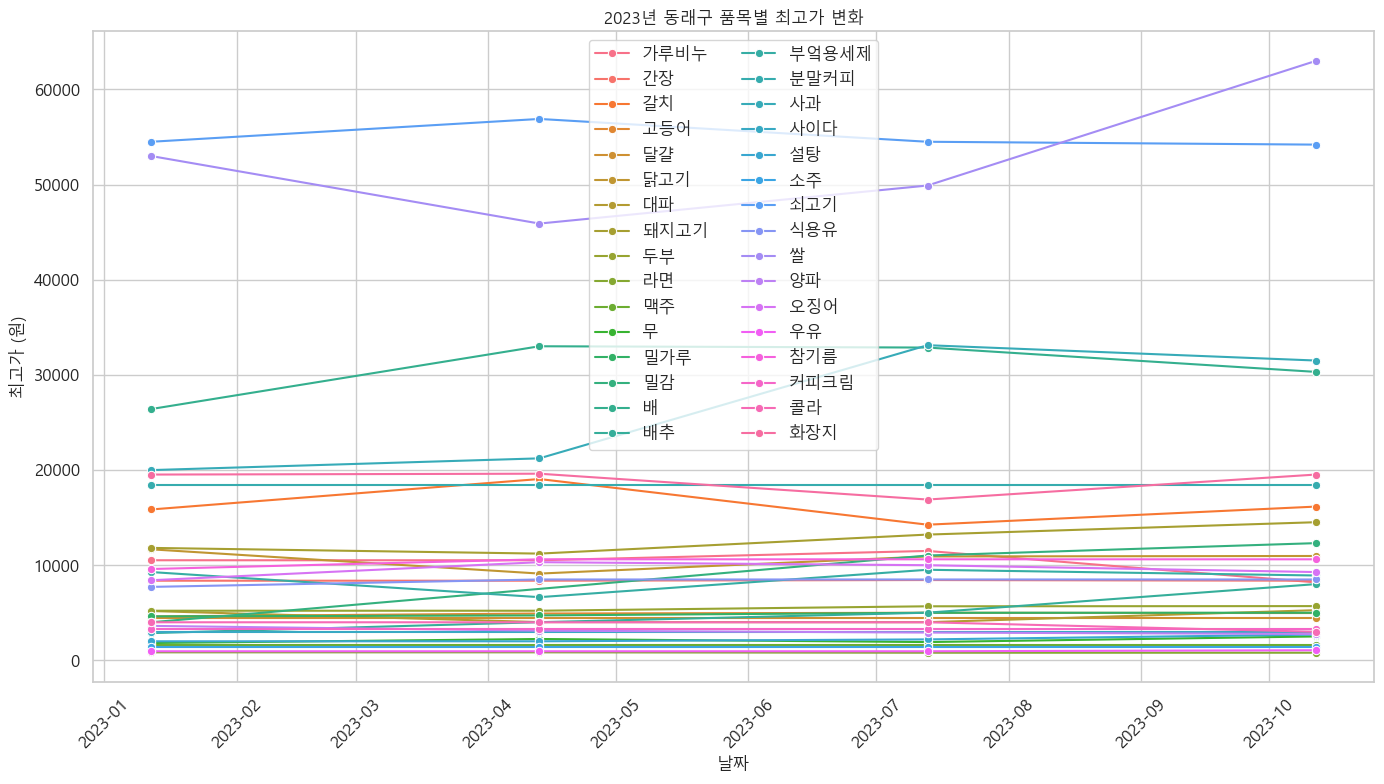

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2023_1q.csv")
q2 = pd.read_csv("동래구2023_2q.csv")
q3 = pd.read_csv("동래구2023_3q.csv")
q4 = pd.read_csv("동래구2023_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2023년 동래구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("동래구2023_max.csv", index=False, encoding="utf-8-sig")